In [9]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, 
                     plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [6]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img, cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

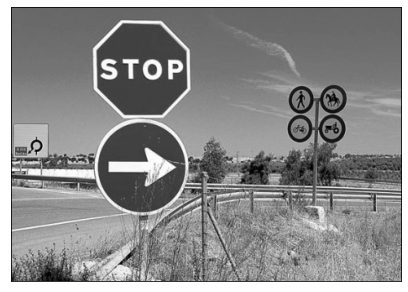

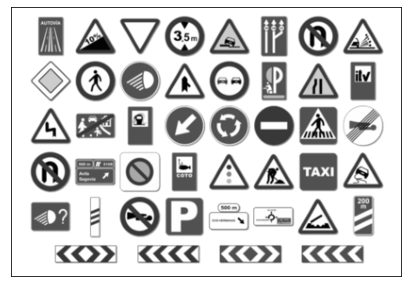

In [22]:
image_signals = rgb2gray(plt.imread('/content/senales-trafico.jpeg'))
imshow(image_signals)
image_catalogo = rgb2gray(plt.imread('/content/603604-senalesver.png')).astype('float')
imshow(image_catalogo)

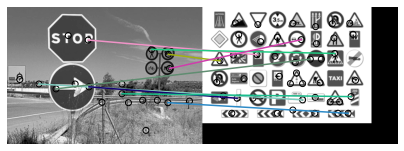

In [24]:
# Detectan posiciones distintivas de las images
keypoints_señales = corner_peaks(corner_harris(image_signals), min_distance=20)
keypoints_catalogo = corner_peaks(corner_harris(image_catalogo), min_distance=20)

# Dado la imagen original extrae la caracteristicas singulares y se obtiene los 
# descriptores, que son magnitud, sentido,etc de los pixeles extraidos
extractor = BRIEF()
extractor.extract(image_signals, keypoints_señales)
keypoints_señales = keypoints_señales[extractor.mask]
descriptor_señales = extractor.descriptors

extractor.extract(image_catalogo, keypoints_catalogo)
keypoints_catalogo = keypoints_catalogo[extractor.mask]
descriptor_catalogo = extractor.descriptors

match = match_descriptors(descriptor_señales, 
                          descriptor_catalogo, 
                          cross_check=True)

fig, ax = plt.subplots(figsize=(7, 7))
plot_matches(ax, 
             image_signals, 
             image_catalogo, 
             keypoints_señales, 
             keypoints_catalogo, 
             match)
ax.axis('off')
plt.show()

# Esto se podría usar para ver cuanto se usa un logo de una marca de un partido 
# de futbol